### Codigo para la propagación de onda acustica 1D sin fuente solo con perturbación inicial
En este Notebook se presenta un codigo para la propagación de onda acustica 1D sin fuente solo con perturbación inicial, y se incluye tres condiciones de borde:
- Borde Fijo
- Borde libre 
- Borde absorbente

#### Solución numérica de la Ecuación de Onda Acustica (método de diferencias finitas)
La ecuación de onda acústica en 1D con densidad constante sin fuente es:

$$
\partial^2_t p(x,t) \ = \ c(x)^2 \partial_x^2 p(x,t)
$$

con presión $p$, la velocidad de propagación $c$, la cual contiene dos derivadas parciales segundas que se pueden aproximar con la fórmula de diferencia centrada de la siguiente manera:

- Segunda derivada temporal
$$
\partial^2_t p(x,t) \ \approx \ \frac{p(x,t+dt) - 2 p(x,t) + p(x,t-dt)}{dt^2} 
$$
- Segunda derivada espacial
$$
\partial^2_x p(x,t) \ \approx \ \frac{p(x+dx,t) - 2 p(x,t) + p(x-dt,t)}{dx^2} 
$$

Al utilizar estas aproximaciones en la ecuación de onda nos permite formular la presión $p(x)$ para el paso de tiempo $𝑡 + 𝑑𝑡$ (el futuro) en función de la presión en el tiempo $𝑡$ (ahora) y $𝑡 − 𝑑𝑡$ (el pasado). Esto se llama un esquema explícito que permite que el 𝑒𝑥𝑡𝑟𝑎𝑝𝑜𝑙𝑎c𝑖ó𝑛 del campo dependiente del espacio en el futuro solo usando el vecindario los puntos vecinos.

Reemplazamos la parte dependiente del tiempo (tiempo es índice superior, espacio es índice inferior) por:

$$
 \frac{p_{i}^{n+1} - 2 p_{i}^n + p_{i}^{n-1}}{dt^2} \ = \ c^2_i \left(\frac{p_{i+1}^{n} - 2 p_{i}^n + p_{i-1}^{n}}{dx^2}\right) 
$$

resolviendo por $p_{i}^{n + 1}$.

El esquema de extrapolación es:

$$
p_{i}^{n+1} \ = \ c_i^2 \frac{dt^2}{dx^2} \left[p_{i+1}^{n} - 2 p_{i}^n + p_{i-1}^{n} \right]
+ 2p_{i}^n - p_{i}^{n-1}
$$

#### Estabilidad (Criterio de Courant)

Ahora, presentamos el parámetro epsilon $\epsilon$ conocido como el criterio de Courant, el cual nos permite determinar numéricamente el límite de estabilidad del código con la mayor precisión posible aumentando el paso de tiempo.

El criterio de Courant se define como:

$$
\epsilon = c \frac{ dt}{dx} \leq 1
$$

Con esta información podemos calcular el paso de tiempo máximo posible y estable.

#### Perturbación inicial

Se usa un pulso gaussiano como pertubación inicial cuya ecuación es:

$$
A*e^{-0.5*\left(\frac{x-np}{s}\right)^2}
$$

donde $A$ es la amplitud, $np$ es el punto de origen en la dirección $x$ y $s$ es el ancho del pulso. El pulso gaussiano es especificado para el tiempo $t=1$.

#### Condiciones de borde
Como se explico en la introducción se incluye tres condiciones de borde:
- Borde Fijo:
  
  Tambien conocida como condicion de borde de Dirichlet, y se especifica como que $u(bordes)=0$
  
  
- Borde libre:

  Tambien conocida como condicion de borde de Neumann, y se especifica como que $\frac{\partial u}{\partial x}|_{bordes} = 0$.
  
- Borde absorbente:

    Para aplicar condiciones límite absorbentes en los extremos del espacio de simulación, los valores de la función de onda en los límites se establecen en los valores de la función de onda adyacentes un paso antes.

In [1]:
# This program describes a moving 1-D wave using the finite difference method
import numpy as np
import matplotlib
# Show Plot in The Notebook
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
#-------------------------------------------------------------#
#Initialization
Nx = 201                    # Number of spatial grid points
L = 100                     # length of simulation region
dx= L / Nx                 # Step size
#hx= 1                       # Step size
x = np.linspace(-L, L , Nx)  # Spatial grid spacing
v = 10                     # wave or propagation speed
ps = 101                     # source location in grid in x-direction
Nt = 401                    # Number of time steps
S = 1                      # Courant number
dt = S * dx / v            # Time-Step
#ht = 0.003                  # Time-Step
#S = v*(ht/hx)               # Courant number
t = np.linspace(0,dt*Nt,Nt) # Time grid spacing
# Gaussian pulse
A = 0.8       # pulse amplitude
s = 2.5       # pulse width

<IPython.core.display.Javascript object>


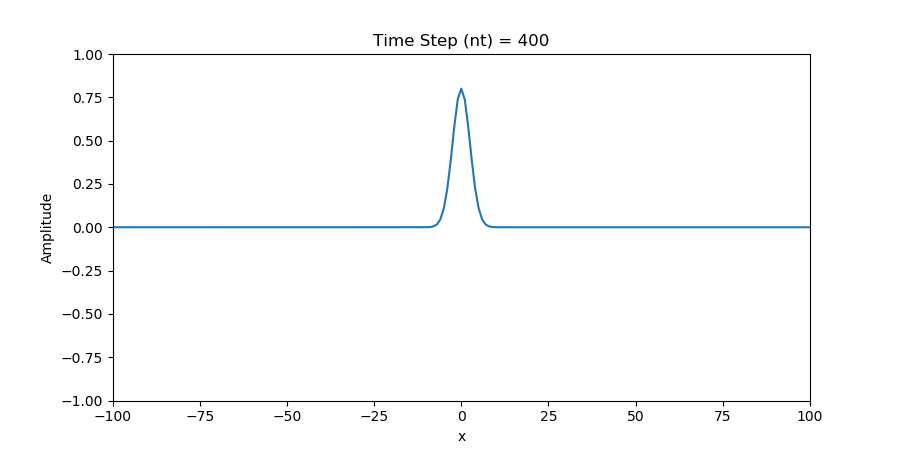

In [3]:
# Initialise wavefunction and set boundary conditions (comments / uncommnet)
u = np.zeros((Nx,Nt))

# Plot position configuration
# ---------------------------
plt.ion()
fig2  = plt.figure(figsize=(9, 4.5))

# Plot 1D wave propagation
# ------------------------
# Note: comma is needed to update the variable
up31,= plt.plot(x,u[:,0]) # plot pressure update each time step
plt.xlim(-100, 100)
plt.ylim(-1.0, 1.0)
plt.title('Time Step (nt) = 0')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.show()

#  Set Boundary Conditions in main FTTD time loop
# ========================================================================
# SETUP
# ========================================================================

for nx  in range(2,Nx): # time step nt = 1
    u[nx-1,0] = A*np.exp(-0.5*((nx-ps)/s)**2)

for nx in range(2,Nx):   # time step 2
#     u[nx-1,1] = A*np.exp(-0.5*((nx-ps-1)/s)**2)
      u[nx-1,1] = u[nx-1,0]

# == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == ==
# Solving the scalar wave equation FDTD
# == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == ==

for nt in range(1,Nt-1):
    for nx in range(1,Nx-1):
        u[nx,nt+1] = 2*u[nx,nt] - u[nx,nt-1] + S**2*(u[nx+1,nt] - 2*u[nx,nt] + u[nx-1,nt])

# Set Boundary Conditions comment / uncomment
        u[0,nt+1] = 0                       # Fixed end
        u[Nx-1,nt+1] = 0                    # Fixed end
#        u[Nx-1, nt+1] = u[Nx-2, nt+1]       # Free end
#        u[0, nt + 1] = u[1, nt + 1]         # Free end
#        u[Nx-1, nt + 1] = u[Nx - 2, nt]      # ABC
#        u[0, nt + 1] = u[1, nt]            # ABC

for tt in range(0,Nt):
    idisp = 1 # display frequency
    if (tt % idisp) == 0:
        plt.title('Time Step (nt) = %d' % tt)
        up31.set_ydata(u[:,tt])
        plt.gcf().canvas.draw()
plt.close()